In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv('HRDataset_v14.csv', sep=',')
dados.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# 1 - Executar estatísticas descritivas básicas no Python

In [10]:
# 1 Vamos pegar o nome das colunas
colunas = list(dados.columns)
print(colunas)

# Da análise do HEAD, podemos eliminar as colunas que são IDs. Vamos fazer isso criando outro DataFrame

dados_filtrados = dados[['Employee_Name', 'EmpID', 'Salary', 'Termd', 'Position', 'State', 'Sex', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']]
dados_filtrados.describe()

['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']


,EmpID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,69020.684887,0.334405,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,25156.636930,0.472542,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,45046.000000,0.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,55501.500000,0.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,62810.000000,0.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,72036.000000,1.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,250000.000000,1.000000,5.000000,5.000000,8.000000,6.000000,20.000000


# 2 - Fazer um histograma com salários. Quais faixas salariais são as mais populares?

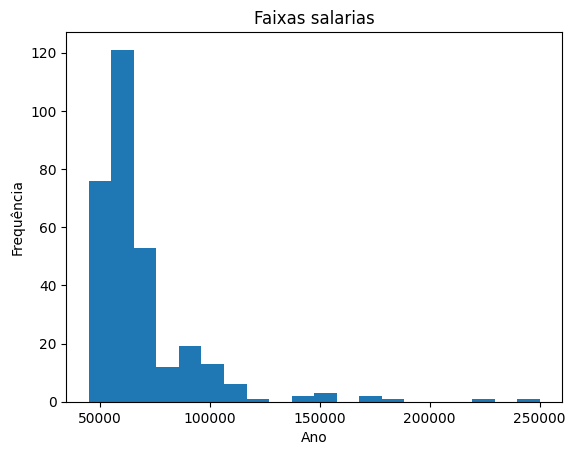

In [27]:
dados['Salary'].plot(kind='hist', bins=20, title='Faixas salarias')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()

# 3 - Fazer um gráfico de violino com salários, discriminados por gênero.

/tmp/ipykernel_7129/1275456744.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Sex', y='Salary', data=dados, scale='count')


<Axes: xlabel='Sex', ylabel='Salary'>

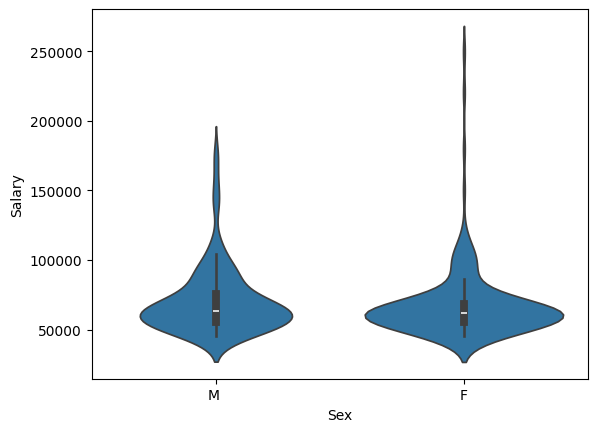

In [20]:
sns.violinplot(x='Sex', y='Salary', data=dados, scale='count')

# 4 - Traçar a série temporal correspondente à data de contratação (DateofHire)

DateofHire
2006-01-09    1
2007-06-25    1
2007-11-05    1
2008-01-07    1
2008-09-02    1
             ..
2017-01-07    1
2017-02-10    1
2017-02-15    2
2017-04-20    2
2018-07-09    1
Length: 101, dtype: int64


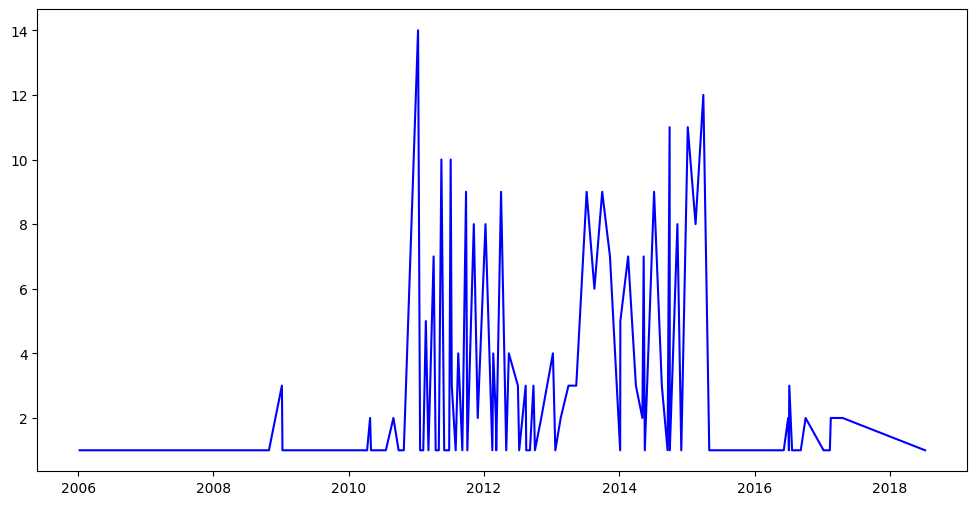

In [28]:
dados['DateofHire'] = pd.to_datetime(dados['DateofHire'])
contratacoes_por_ano = dados.groupby('DateofHire').size()
print(contratacoes_por_ano)
plt.figure(figsize=(12, 6))
plt.plot(contratacoes_por_ano.index, contratacoes_por_ano.values, linestyle='-', color='b')
